In [103]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [104]:
import numpy
import pandas

In [105]:
import pandas as pd
rand_seed = 42

enzyme_gene = pd.read_csv("enzyme_gene.csv", index_col=0)
enzyme_gene

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,GM,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
enzyme_gene.head(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0


In [107]:
enzyme_gene.shape

(5238, 18)

In [108]:
# get all feature names
features = enzyme_gene.columns[1:]
features

Index(['Func_likelihood', 'Fam_size', 'Max_id_paralog', 'WGD_alpha',
       'WGD_beta_gamma', 'Dup_recent', 'Dup_tandem', 'Singleton',
       'Max_PCC_GM_abiotic', 'Max_PCC_SM_abiotic', 'Max_PCC_GM_biotic',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_hormone', 'Max_PCC_SM_hormone',
       'Expr_med_dev', 'Expr_max_dev', 'Expr_breadth_dev'],
      dtype='object')

In [109]:
enzyme_gene.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT1G80230,unknown,1.00,3.0,73.61,1.0,0.0,0.0,0.0,0.0,0.833,0.662,0.874,0.771,0.938,0.794,665.340926,1808.088363,64.0
AT5G63600,SM,0.44,99.0,57.82,0.0,0.0,0.0,0.0,0.0,0.882,0.909,0.958,0.956,0.907,0.800,7.172612,8612.786059,12.0
AT5G34780,GM,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G19580,GM,1.00,5.0,78.57,0.0,0.0,0.0,0.0,0.0,0.740,0.633,0.864,0.844,0.833,0.798,250.146719,471.506073,64.0


In [110]:
enzyme_gene.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,3550.000000,4152.000000,3899.000000,4769.000000,4769.000000,4501.000000,4512.000000,4240.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4150.000000,4150.000000,4150.000000
mean,0.804897,29.770472,66.566127,0.279094,0.122667,0.049767,0.270612,0.051651,0.789531,0.725130,0.848149,0.793080,0.815422,0.746845,428.028998,2191.368616,44.368675
std,0.254692,41.524700,18.041234,0.448601,0.328089,0.217487,0.444325,0.221347,0.090319,0.106227,0.079397,0.099534,0.082482,0.104096,1042.343895,3327.095677,24.428359
min,0.000000,1.000000,19.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424000,0.322000,0.531000,0.445000,0.486000,0.412000,3.233606,5.763663,0.000000
25%,0.690750,4.000000,54.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.731000,0.655000,0.800000,0.728000,0.762000,0.673000,14.464360,326.100708,17.000000
50%,0.940000,11.000000,70.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.737000,0.857000,0.804000,0.822000,0.748000,117.897502,982.311288,60.000000
75%,0.990000,34.000000,80.420000,1.000000,0.000000,0.000000,1.000000,0.000000,0.857000,0.806000,0.908000,0.871000,0.878000,0.824250,400.282721,2564.031166,64.000000
max,1.000000,293.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.982000,0.992000,0.983000,0.987000,0.978000,20115.064720,30288.301360,64.000000


In [111]:
enzyme_gene.nunique()

Label                    3
Func_likelihood        538
Fam_size                56
Max_id_paralog        2525
WGD_alpha                2
WGD_beta_gamma           2
Dup_recent               2
Dup_tandem               2
Singleton                2
Max_PCC_GM_abiotic     429
Max_PCC_SM_abiotic     503
Max_PCC_GM_biotic      383
Max_PCC_SM_biotic      450
Max_PCC_GM_hormone     397
Max_PCC_SM_hormone     487
Expr_med_dev          4150
Expr_max_dev          4149
Expr_breadth_dev        65
dtype: int64

In [112]:
enzyme_gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5238 entries, AT2G20690 to nan
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Label               4913 non-null   object 
 1   Func_likelihood     3550 non-null   float64
 2   Fam_size            4152 non-null   float64
 3   Max_id_paralog      3899 non-null   float64
 4   WGD_alpha           4769 non-null   float64
 5   WGD_beta_gamma      4769 non-null   float64
 6   Dup_recent          4501 non-null   float64
 7   Dup_tandem          4512 non-null   float64
 8   Singleton           4240 non-null   float64
 9   Max_PCC_GM_abiotic  4152 non-null   float64
 10  Max_PCC_SM_abiotic  4152 non-null   float64
 11  Max_PCC_GM_biotic   4152 non-null   float64
 12  Max_PCC_SM_biotic   4152 non-null   float64
 13  Max_PCC_GM_hormone  4152 non-null   float64
 14  Max_PCC_SM_hormone  4152 non-null   float64
 15  Expr_med_dev        4150 non-null   float64
 16  Expr

In [113]:
print(enzyme_gene["Label"].value_counts())

Label
unknown    2291
GM         2212
SM          410
Name: count, dtype: int64


In [114]:
enzyme_gene.isnull().sum()

Label                  325
Func_likelihood       1688
Fam_size              1086
Max_id_paralog        1339
WGD_alpha              469
WGD_beta_gamma         469
Dup_recent             737
Dup_tandem             726
Singleton              998
Max_PCC_GM_abiotic    1086
Max_PCC_SM_abiotic    1086
Max_PCC_GM_biotic     1086
Max_PCC_SM_biotic     1086
Max_PCC_GM_hormone    1086
Max_PCC_SM_hormone    1086
Expr_med_dev          1088
Expr_max_dev          1088
Expr_breadth_dev      1088
dtype: int64

In [115]:
import matplotlib
import seaborn

In [116]:
# The 1st ":" is to get all rows. The "1:" part is to get the 2nd column and on.
feature_values = enzyme_gene.iloc[:, 1:]
feature_values

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,
AT2G20690,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


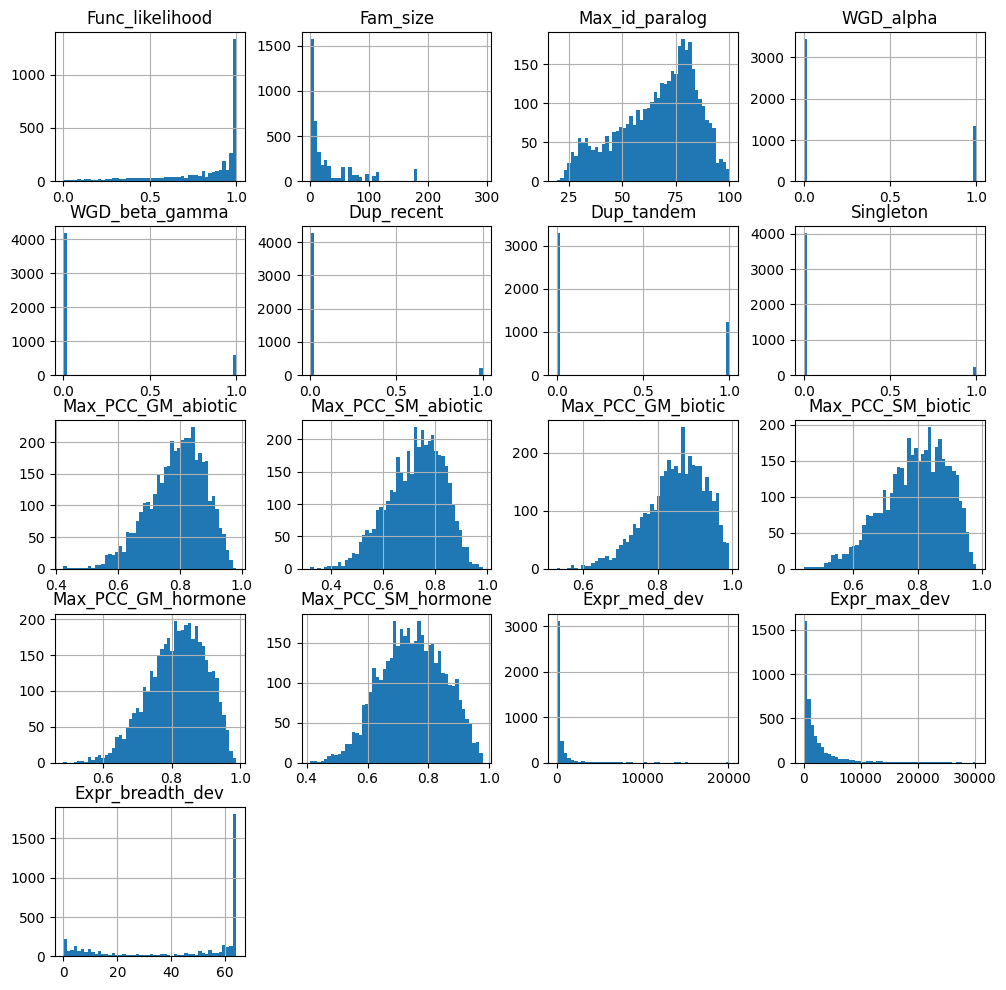

In [117]:
# Draw histogram
hist = feature_values.hist(figsize=(12,12), bins=50)

In [118]:
# Calculate Spearman's rank correlations for all feature pairs
corr = feature_values.corr(method ='spearman')
corr

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Func_likelihood,1.000000,-0.425232,-0.044509,0.048101,-0.031368,-0.159467,-0.365871,0.145597,0.270916,0.046910,0.133880,0.010729,0.252289,0.087491,0.809380,0.486005,0.803178
Fam_size,-0.425232,1.000000,0.126797,-0.056985,0.013941,0.115253,0.344059,-0.206112,-0.158623,0.013337,-0.052723,0.028097,-0.096479,0.003539,-0.381190,-0.105345,-0.439901
Max_id_paralog,-0.044509,0.126797,1.000000,-0.028074,-0.000748,0.090542,0.231457,-0.274425,-0.026789,-0.020144,-0.027380,-0.002215,0.031349,0.060209,-0.013421,0.076196,-0.051526
WGD_alpha,0.048101,-0.056985,-0.028074,1.000000,0.068015,0.002366,-0.033998,0.006703,0.022448,-0.004108,0.002457,-0.011307,0.011289,0.000698,0.039406,-0.011395,0.049960
WGD_beta_gamma,-0.031368,0.013941,-0.000748,0.068015,1.000000,0.014659,-0.004633,-0.024479,-0.001354,-0.004194,0.014195,0.004963,0.009639,-0.004969,-0.020867,-0.006981,-0.028465
Dup_recent,-0.159467,0.115253,0.090542,0.002366,0.014659,1.000000,0.189511,-0.045019,-0.046663,-0.021227,-0.014142,0.008451,-0.088582,-0.061154,-0.105114,-0.102642,-0.118330
Dup_tandem,-0.365871,0.344059,0.231457,-0.033998,-0.004633,0.189511,1.000000,-0.141858,-0.072686,0.054327,0.009010,0.080658,-0.058476,0.042842,-0.294494,-0.136162,-0.330194
Singleton,0.145597,-0.206112,-0.274425,0.006703,-0.024479,-0.045019,-0.141858,1.000000,0.056676,-0.014765,0.032353,-0.006439,0.006871,-0.052028,0.108895,-0.041977,0.159309
Max_PCC_GM_abiotic,0.270916,-0.158623,-0.026789,0.022448,-0.001354,-0.046663,-0.072686,0.056676,1.000000,0.702527,0.327993,0.275294,0.166645,0.054970,0.312563,0.215558,0.238961
Max_PCC_SM_abiotic,0.046910,0.013337,-0.020144,-0.004108,-0.004194,-0.021227,0.054327,-0.014765,0.702527,1.000000,0.272101,0.311541,0.076733,0.103616,0.094686,0.151211,0.025415


<Axes: >

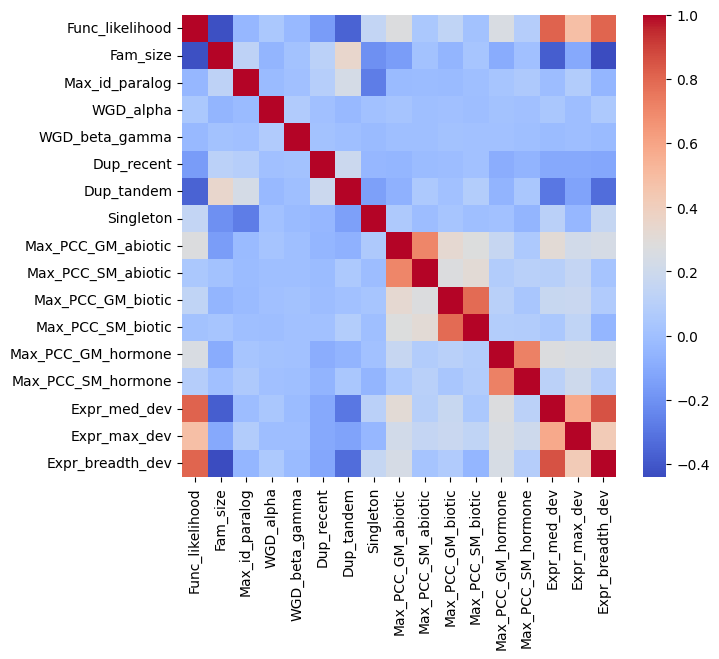

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.heatmap(corr, cmap="coolwarm")

In [120]:
labels = ['GM', 'SM']
labels

['GM', 'SM']

In [121]:
label_column = enzyme_gene['Label']
label_column

Gene
AT2G20690     GM
AT5G10920     GM
AT4G02580     GM
AT5G52840     GM
AT4G02620     GM
            ... 
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
Name: Label, Length: 5238, dtype: object

In [122]:
labels              = ['GM', 'SM']
label_column        = enzyme_gene['Label']
label_column_filter = label_column.isin(labels)

# enzyme_gene dataframe with only GM and SM
enzyme_gene_fil = enzyme_gene[label_column_filter]

# Count the occurence of unique values
enzyme_gene_fil['Label'].value_counts()

Label
GM    2212
SM     410
Name: count, dtype: int64

In [123]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,GM,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,SM,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,SM,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,SM,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


In [124]:
# import the proprecessing functions
from sklearn import preprocessing

# Create a LabelEncoder object: this is simply a software tool that turn
# (encode) texts into 0 or 1 (labels) in this case.
le = preprocessing.LabelEncoder()

# Send the Label column of enzyme_gene_fil dataframe to the LabelEncoder so
# it can fit (i.e., learn) how to encode the labels.
le.fit(enzyme_gene_fil.Label)

# Now, used the fitted (learned) encoder to transform texts to labels
enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)

<ipython-input-124-53b6e9b3aa14>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)


In [125]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,0,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,0,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,1,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,1,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,1,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


In [126]:
enzyme_gene_fil['Label'].value_counts()

Label
0    2212
1     410
Name: count, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
                enzyme_gene_fil,                # The data to split
                test_size=0.2,                  # Proportion data for testing
                stratify=enzyme_gene_fil.Label, # Make sure proportions of 0/1
                                                # labels are similar between
                                                # training and testing sets
                random_state=rand_seed)

In [128]:
# Print out proportions of different labels in the training data
print(train['Label'].value_counts()/train.shape[0])

Label
0    0.843586
1    0.156414
Name: count, dtype: float64


In [129]:
# Print out proportions of different labels in the testing data
print(test['Label'].value_counts()/test.shape[0])

Label
0    0.84381
1    0.15619
Name: count, dtype: float64


In [130]:
enzyme_gene_fil.shape

(2622, 18)

In [131]:
# ask which values are null.
row_na     = enzyme_gene_fil.isnull()
row_na

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
AT5G10920,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02580,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT5G52840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02620,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT2G29460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT1G59700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [132]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = train.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT1G44575     1
AT1G16350     2
AT4G00500     1
AT4G26850     3
ATCG00670    13
dtype: int64

In [133]:
num_feat     = train.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
train_keep = train[rows_to_keep]             # training data with rows to keep
train_keep['Label'].value_counts()

Label
0    1529
1     272
Name: count, dtype: int64

In [137]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(test_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
test_keep_imp = imputer.transform(train_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
test_keep_imp = pd.DataFrame(test_keep_imp, columns=train.columns)
test_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
1059,0.0,1.000,2.0,52.04,0.0,0.0,0.0,0.0,0.0,0.727,0.659,0.866,0.750,0.810,0.521,246.675835,777.212275,64.0
1016,1.0,0.381,31.0,58.74,0.0,0.0,0.0,0.0,0.0,0.778,0.678,0.745,0.717,0.690,0.800,7.897757,2188.620573,14.0
1152,0.0,0.680,4.0,66.39,0.0,0.0,0.0,0.0,0.0,0.917,0.841,0.933,0.810,0.880,0.693,112.581101,373.304679,55.0
1177,1.0,1.000,6.0,65.28,0.0,0.0,0.0,0.0,0.0,0.947,0.807,0.962,0.902,0.823,0.621,1116.735514,2838.056115,64.0


In [138]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = test.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT3G28180    0
AT2G12190    0
AT2G33040    0
AT4G29680    0
AT1G36160    0
dtype: int64

In [140]:
num_feat     = test.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
train_keep = test[rows_to_keep]             # training data with rows to keep
train_keep['Label'].value_counts()

Label
0    367
1     63
Name: count, dtype: int64

In [141]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(train_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
train_keep_imp = imputer.transform(train_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
train_keep_imp = pd.DataFrame(train_keep_imp, columns=train.columns)
train_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
401,0.0,0.990,2.0,25.79,0.0,0.0,0.0,0.0,0.0,0.914,0.841,0.895,0.827,0.797,0.745,286.055224,472.155582,64.0
417,0.0,1.000,67.0,36.62,0.0,0.0,0.0,0.0,0.0,0.817,0.803,0.766,0.768,0.856,0.786,250.767077,1083.028648,64.0
95,0.0,0.385,56.0,54.25,0.0,0.0,0.0,1.0,0.0,0.662,0.589,0.780,0.759,0.848,0.831,9.221203,47.252050,2.0
267,0.0,0.990,31.0,53.35,0.0,0.0,0.0,0.0,0.0,0.804,0.825,0.806,0.837,0.774,0.658,309.294821,927.778842,64.0


In [142]:
##ANSWER##
# Sum the number of NAs in each row of the testing set
row_na_num = test.isnull().sum(axis=1)

# Get the number of features
num_feat   = test.shape[1] - 1

# Determine which rows have below threshold (25%) NAs
row_na_below_threshold = row_na_num/num_feat < 0.25

# Get the rows we want to keep
test_keep  = test[row_na_below_threshold]

# Impute missing values
test_keep_imp = imputer.transform(test_keep)
test_keep_imp = pd.DataFrame(test_keep_imp, columns=test.columns)
test_keep_imp.isnull().sum()

Label                 0
Func_likelihood       0
Fam_size              0
Max_id_paralog        0
WGD_alpha             0
WGD_beta_gamma        0
Dup_recent            0
Dup_tandem            0
Singleton             0
Max_PCC_GM_abiotic    0
Max_PCC_SM_abiotic    0
Max_PCC_GM_biotic     0
Max_PCC_SM_biotic     0
Max_PCC_GM_hormone    0
Max_PCC_SM_hormone    0
Expr_med_dev          0
Expr_max_dev          0
Expr_breadth_dev      0
dtype: int64

In [143]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# training features
X_train = train_keep_imp.iloc[:,1:]

# training labels
y_train = train_keep_imp.iloc[:,0]

# This will be used in many other occasions.
feat_names = X_train.columns

# summarize class distribution
counter = Counter(y_train)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_bal, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print("After :", counter)

Before: Counter({0.0: 367, 1.0: 63})
After : Counter({0.0: 146, 1.0: 146})


In [144]:
from sklearn.preprocessing import RobustScaler

# initialize a scaler
scaler = RobustScaler()

# fit the scaler with training features
scaler.fit(X_train_bal)

# transform the training feature values with the fitted scaler
X_train_scale = scaler.transform(X_train_bal)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,2.920000e+02,2.920000e+02,2.920000e+02,292.000000,292.000000,292.000000,292.000000,292.000000,2.920000e+02,2.920000e+02,292.000000,2.920000e+02,292.000000,2.920000e+02,2.920000e+02,292.000000,292.000000
mean,-2.576629e-01,3.964847e-01,-1.677398e-01,0.441330,0.157939,0.065399,0.326835,0.046350,2.733917e-02,-1.029527e-01,-0.022730,-5.821199e-02,-0.067426,6.298824e-02,1.097438e+00,0.495544,-0.051048
std,6.305592e-01,7.977227e-01,7.137597e-01,0.651732,0.336611,0.223463,0.435321,0.201688,7.914595e-01,7.178032e-01,0.720689,6.757159e-01,0.739233,7.226710e-01,3.630741e+00,1.339596,0.463346
min,-1.682908e+00,-2.841933e-01,-2.016211e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-2.105937e+00,-2.038496e+00,-2.800000,-2.283258e+00,-2.914513,-1.987211e+00,-1.471574e-01,-0.300738,-0.731206
25%,-7.174635e-01,-1.870078e-01,-6.600522e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-4.861706e-01,-5.996475e-01,-0.506977,-5.529204e-01,-0.515689,-4.526621e-01,-1.135573e-01,-0.250320,-0.563537
50%,-1.179612e-16,2.580401e-17,-3.161534e-16,0.000000,0.000000,0.000000,0.000000,0.000000,5.425348e-16,-3.994201e-16,0.000000,3.942159e-16,0.000000,4.237062e-16,-1.496199e-17,0.000000,0.000000
75%,2.825365e-01,8.129922e-01,3.399478e-01,1.000000,0.000000,0.000000,1.000000,0.000000,5.138294e-01,4.003525e-01,0.493023,4.470796e-01,0.484311,5.473379e-01,8.864427e-01,0.749680,0.436463
max,3.456665e-01,2.302386e+00,1.203628e+00,1.571901,1.000000,1.000000,1.000000,1.000000,1.888413e+00,1.587403e+00,1.451163,1.274347e+00,1.405152,1.782851e+00,3.601007e+01,9.392902,0.454998


In [145]:
# put your code here

##ANSWER##
X_test = test_keep_imp.iloc[:,1:]
y_test = test_keep_imp.iloc[:,0]

X_test_scale = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)
##ANSWER##

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a function for running RandomForest
def run_randomforest(X_train, y_train):
    # Below is a Python dictionary specify the hyperparameters to be tested
    #  2x3x4x1 = 24
    param_grid = {'n_estimators': [200, 500],
                  'max_features': ['sqrt', 'log2'],
                  'max_depth' : [3,5,7,9],
                  'criterion' :['entropy']}

    # Initialize a random forest classifier (rfc) with a random seed
    rfc = RandomForestClassifier(random_state=rand_seed)

    # Initialize a grid search object that will search through each of the 24
    # hyperparameter combinations. For each combination, a five fold cross-
    # validation (cv) is done. So totally 24x5 = 120 random forest classifiers
    # will be build.
    rfc_gs = GridSearchCV(
                rfc,
                param_grid,
                cv=5,              # cross validation folds
                verbose=2,         #
                scoring='roc_auc', # find model with the best ROC-AUC
                n_jobs=8)          # number of concurrent jobs, you need to
                                   # adjust this based on the number of CPU cores
                                   # available on your machine.

    # Pass the training feaure and label data to the grid search object and
    # start fitting (training) models
    rfc_gs.fit(X_train, y_train)

    # Return the fitted grid search object
    return rfc_gs

In [149]:
rfc_gs = run_randomforest(X_train_scale, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [150]:
# The best model (also called estimator)
best_model = rfc_gs.best_estimator_

# Note that the best hyperparameters are also reported
best_model

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200,
                       random_state=42)

In [151]:
import pickle

filename = "model_randomforest_gridsearch.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

In [152]:
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# COMMENT: What does this do?
#
param_grid = {'C': [1, 10, 1e2],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}

# COMMENT: What does this do?
#
svc    = SVC()

# COMMENT: What does this do?
#
svc_gs = GridSearchCV(svc, param_grid, cv=5, verbose=2, scoring='roc_auc',
                      n_jobs=8)

# COMMENT: What does this do?
#
svc_gs.fit(X_train_scale, y_train)

# COMMENT: What does this do?
#
filename = "model_svc_gridsearch.save"
pickle.dump(svc_gs.best_estimator_, open(filename, 'wb'))

# COMMENT: What does these do?
#
print(svc_gs.best_params_)
print(svc_gs.best_score_)

##COMMENT ANSWERS##
#  Set up the hyperparameter combinations: 3x4x2 = 24 runs
#  Intialize a support vector classifier
#  Initiate a grid search object with cross validation
#  Search for the best hyperparameters with training data
#  Save the best model as a file
#  Print out the best parameters and best scores

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.9111613158937774


In [153]:
from sklearn.inspection import permutation_importance

# Specify the best model (estimator) from our RandomForest run
rfc = rfc_gs.best_estimator_

# Calculate permutation importance of each feature
result = permutation_importance(
    rfc, X_train_scale, y_train, n_repeats=10, random_state=42, n_jobs=8)

# COMMENTS: What can you find in the result?
#
#
result

{'importances_mean': array([0.02123288, 0.06575342, 0.00445205, 0.02089041, 0.00650685,
        0.        , 0.04246575, 0.        , 0.00273973, 0.01130137,
        0.00342466, 0.00410959, 0.00034247, 0.00753425, 0.00479452,
        0.0109589 , 0.02294521]),
 'importances_std': array([0.00762707, 0.00903487, 0.00267474, 0.00357545, 0.0010274 ,
        0.        , 0.00512556, 0.        , 0.00136986, 0.00406656,
        0.00265273, 0.00298555, 0.0010274 , 0.00256278, 0.00227166,
        0.00368847, 0.00632404]),
 'importances': array([[0.02054795, 0.03424658, 0.03424658, 0.01369863, 0.02054795,
         0.02054795, 0.0239726 , 0.02054795, 0.01027397, 0.01369863],
        [0.05821918, 0.05479452, 0.06164384, 0.06506849, 0.07191781,
         0.07191781, 0.07876712, 0.07876712, 0.06506849, 0.05136986],
        [0.00342466, 0.        , 0.00342466, 0.00342466, 0.00684932,
         0.00342466, 0.01027397, 0.00684932, 0.00342466, 0.00342466],
        [0.02054795, 0.01712329, 0.01712329, 0.023972

In [154]:
# sort the permutation importance based on mean values
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_idx

array([ 1,  6, 16,  0,  3,  9, 15, 13,  4, 14,  2, 11, 10,  8, 12,  7,  5])

In [155]:
enzyme_gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5238 entries, AT2G20690 to nan
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Label               4913 non-null   object 
 1   Func_likelihood     3550 non-null   float64
 2   Fam_size            4152 non-null   float64
 3   Max_id_paralog      3899 non-null   float64
 4   WGD_alpha           4769 non-null   float64
 5   WGD_beta_gamma      4769 non-null   float64
 6   Dup_recent          4501 non-null   float64
 7   Dup_tandem          4512 non-null   float64
 8   Singleton           4240 non-null   float64
 9   Max_PCC_GM_abiotic  4152 non-null   float64
 10  Max_PCC_SM_abiotic  4152 non-null   float64
 11  Max_PCC_GM_biotic   4152 non-null   float64
 12  Max_PCC_SM_biotic   4152 non-null   float64
 13  Max_PCC_GM_hormone  4152 non-null   float64
 14  Max_PCC_SM_hormone  4152 non-null   float64
 15  Expr_med_dev        4150 non-null   float64
 16  Expr

In [157]:
importance_values = result.importances[sorted_idx].T
importance_values

array([[0.05821918, 0.04794521, 0.01712329, 0.02054795, 0.02054795,
        0.00342466, 0.00684932, 0.01027397, 0.00684932, 0.00342466,
        0.00342466, 0.00342466, 0.00684932, 0.00342466, 0.        ,
        0.        , 0.        ],
       [0.05479452, 0.04109589, 0.03424658, 0.03424658, 0.01712329,
        0.01027397, 0.01712329, 0.00684932, 0.00684932, 0.00684932,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.06164384, 0.03767123, 0.02739726, 0.03424658, 0.01712329,
        0.01712329, 0.00684932, 0.00684932, 0.00684932, 0.00684932,
        0.00342466, 0.00342466, 0.        , 0.00342466, 0.        ,
        0.        , 0.        ],
       [0.06506849, 0.04109589, 0.0239726 , 0.01369863, 0.0239726 ,
        0.01369863, 0.01369863, 0.01027397, 0.00684932, 0.00684932,
        0.00342466, 0.00342466, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.07191781, 0.04109589, 0.01712329, 0.020547

In [158]:
# Get the feature names based on the sorted index
ordered_feature_label = X_train_scale.columns[sorted_idx]
ordered_feature_label

Index(['Fam_size', 'Dup_tandem', 'Expr_breadth_dev', 'Func_likelihood',
       'WGD_alpha', 'Max_PCC_SM_abiotic', 'Expr_max_dev', 'Max_PCC_SM_hormone',
       'WGD_beta_gamma', 'Expr_med_dev', 'Max_id_paralog', 'Max_PCC_SM_biotic',
       'Max_PCC_GM_biotic', 'Max_PCC_GM_abiotic', 'Max_PCC_GM_hormone',
       'Singleton', 'Dup_recent'],
      dtype='object')

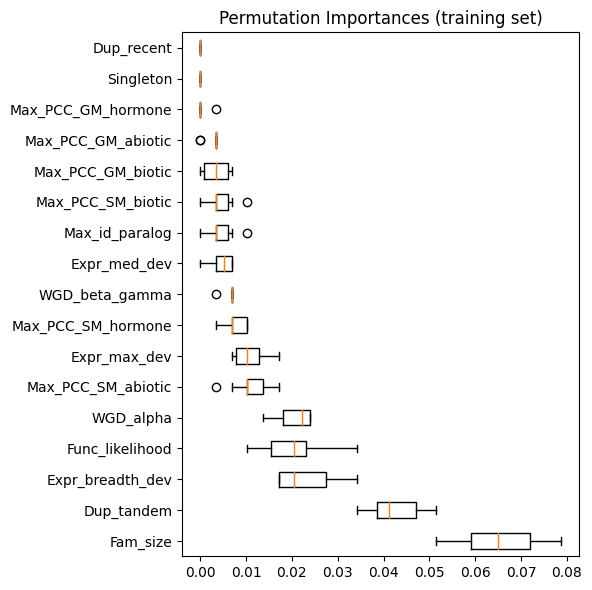

In [159]:
# Plot the permutation importance results
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(importance_values,
           vert=False,
           labels=ordered_feature_label)
ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
plt.show()

In [160]:
# Get top 10 feature names
feat_top10 = ordered_feature_label[:10]

# Get training data with only the top 10 features
X_train_top10 = X_train_scale[feat_top10]
X_train_top10.shape

(292, 10)

In [161]:
# Do the same for testing data
X_test_top10 = X_test_scale[feat_top10]
X_test_top10.shape

(430, 10)

In [162]:
X_train_top10.head(4)

,Fam_size,Dup_tandem,Expr_breadth_dev,Func_likelihood,WGD_alpha,Max_PCC_SM_abiotic,Expr_max_dev,Max_PCC_SM_hormone,WGD_beta_gamma,Expr_med_dev
0,0.553916,1.0,0.102844,-0.327719,0.00000,-0.765115,-0.019624,0.287037,0.0,0.410487
1,-0.269743,0.0,0.269654,0.198363,0.62876,0.400352,0.985175,1.782851,0.2,2.808285
2,-0.269743,0.0,0.454998,0.324623,0.00000,-0.714755,-0.223868,0.142035,0.0,0.284036
3,-0.226393,0.0,0.102844,0.303580,0.00000,0.062223,0.059336,-0.300604,0.0,0.208769


In [163]:
X_test_top10.head(4)

,Fam_size,Dup_tandem,Expr_breadth_dev,Func_likelihood,WGD_alpha,Max_PCC_SM_abiotic,Expr_max_dev,Max_PCC_SM_hormone,WGD_beta_gamma,Expr_med_dev
0,-0.096341,0.0,0.399395,0.324623,1.571901,-1.642813,0.501601,-0.415080,0.0,1.609735
1,2.302386,0.0,-0.601465,-0.645473,0.000000,-1.038496,-0.251580,1.012049,0.0,-0.107604
2,-0.255293,0.0,0.454998,0.345666,1.571901,-0.455763,2.123824,0.996786,0.0,13.567699
3,-0.240843,1.0,0.454998,0.345666,0.000000,0.680928,0.152129,0.233615,0.0,1.370400


In [165]:
rfc_gs = run_randomforest(X_train_top10, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [168]:
import pickle

filename = "model_randomforest_gridsearch1.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

In [169]:
rfc_gs.best_score_

0.9098533491874752

In [170]:
# Get top 5 feature names
feat_top5 = ordered_feature_label[:5]

# Get training data with only the top 10 features
X_train_top5 = X_train_scale[feat_top5]
X_train_top5.shape

(292, 5)

In [172]:
# Do the same for testing data
X_test_top5 = X_test_scale[feat_top5]
X_test_top5.shape

(430, 5)

In [173]:
rfc_gs = run_randomforest(X_train_top5, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [174]:
import pickle

filename = "model_randomforest_gridsearch1.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

In [175]:
rfc_gs.best_score_

0.8854855330955212